In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
%matplotlib inline
import sys
sys.path.append('/home/tomek/ib_tools')

In [2]:
from datastore_pytables import Store

In [3]:
store = Store()

In [4]:
store.keys()

['/cont/min/CL_20191120_NYMEX_USD',
 '/cont/min/CL_20200320_NYMEX_USD',
 '/cont/min/ES_20191220_GLOBEX_USD',
 '/cont/min/ES_20200320_GLOBEX_USD',
 '/cont/min/GC_20191227_NYMEX_USD',
 '/cont/min/GC_20200428_NYMEX_USD',
 '/cont/min/GE_20191216_GLOBEX_USD',
 '/cont/min/NKD_20191212_GLOBEX_USD',
 '/cont/min/NQ_20191220_GLOBEX_USD',
 '/cont/min/NQ_20200320_GLOBEX_USD',
 '/cont/min/YM_20191220_ECBOT_USD',
 '/cont/min/ZB_20191219_ECBOT_USD',
 '/cont/min/ZF_20191231_ECBOT_USD',
 '/cont/min/ZN_20191219_ECBOT_USD']

In [5]:
keys = dict((('gc', '/cont/min/GC_20200428_NYMEX_USD'),
('nq', '/cont/min/NQ_20200320_GLOBEX_USD'),
('es', '/cont/min/ES_20200320_GLOBEX_USD'),
('cl','/cont/min/CL_20200320_NYMEX_USD')))

In [6]:
data = {key: store.read(string).sort_index(ascending=True) for key, string in keys.items()}

In [7]:
data['gc']

,open,high,low,close,volume,average,barCount
date,,,,,,,
2016-10-28 19:50:00,1303.0,1303.0,1303.0,1303.0,1,1303.00,1
2016-10-28 19:51:00,1303.0,1303.0,1303.0,1303.0,0,1303.00,0
2016-10-28 19:52:00,1303.0,1303.0,1303.0,1303.0,0,1303.00,0
2016-10-28 19:53:00,1303.0,1303.0,1303.0,1303.0,0,1303.00,0
2016-10-28 19:54:00,1303.0,1303.0,1303.0,1303.0,0,1303.00,0
...,...,...,...,...,...,...,...
2020-02-19 13:12:00,1611.8,1611.8,1611.6,1611.8,80,1611.75,47
2020-02-19 13:13:00,1611.8,1612.2,1611.8,1612.1,109,1611.98,44
2020-02-19 13:14:00,1612.0,1612.0,1611.5,1611.6,398,1611.71,116


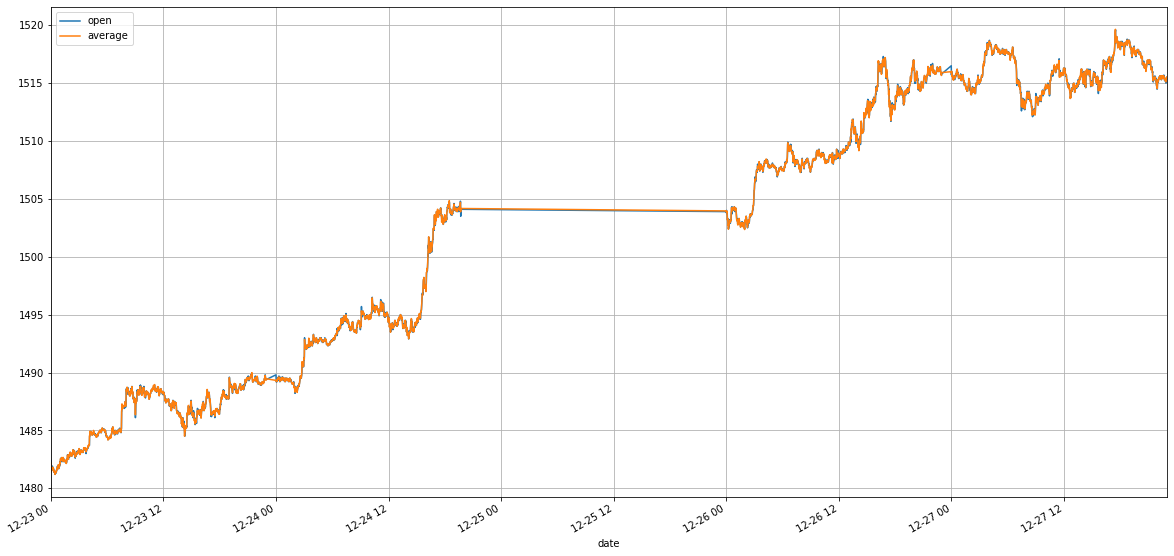

In [8]:
data['gc'].loc['20191222':'20191227'][['open', 'average']].plot(figsize=(20,10), grid=True);

In [9]:
data['cl'].loc['20180101':'20181227'].head(50)

,open,high,low,close,volume,average,barCount
date,,,,,,,
2018-01-02 00:00:00,60.22,60.23,60.16,60.23,5,60.208,5
2018-01-02 00:01:00,60.21,60.21,60.21,60.21,2,60.210,2
2018-01-02 00:02:00,60.21,60.21,60.21,60.21,0,60.210,0
2018-01-02 00:03:00,60.19,60.19,60.19,60.19,1,60.190,1
2018-01-02 00:04:00,60.21,60.23,60.21,60.23,3,60.220,3
2018-01-02 00:05:00,60.23,60.23,60.23,60.23,2,60.230,2
2018-01-02 00:06:00,60.23,60.24,60.23,60.24,3,60.233,2
2018-01-02 00:07:00,60.24,60.24,60.24,60.24,4,60.240,3
2018-01-02 00:08:00,60.24,60.24,60.22,60.22,2,60.230,2


In [10]:
nq = data['nq']

In [11]:
nq['ema_fast'] = nq['close'].ewm(span=5, min_periods=int(5*.8)).mean()
nq['ema_slow'] = nq['close'].ewm(span=120, min_periods=int(120*.8)).mean()

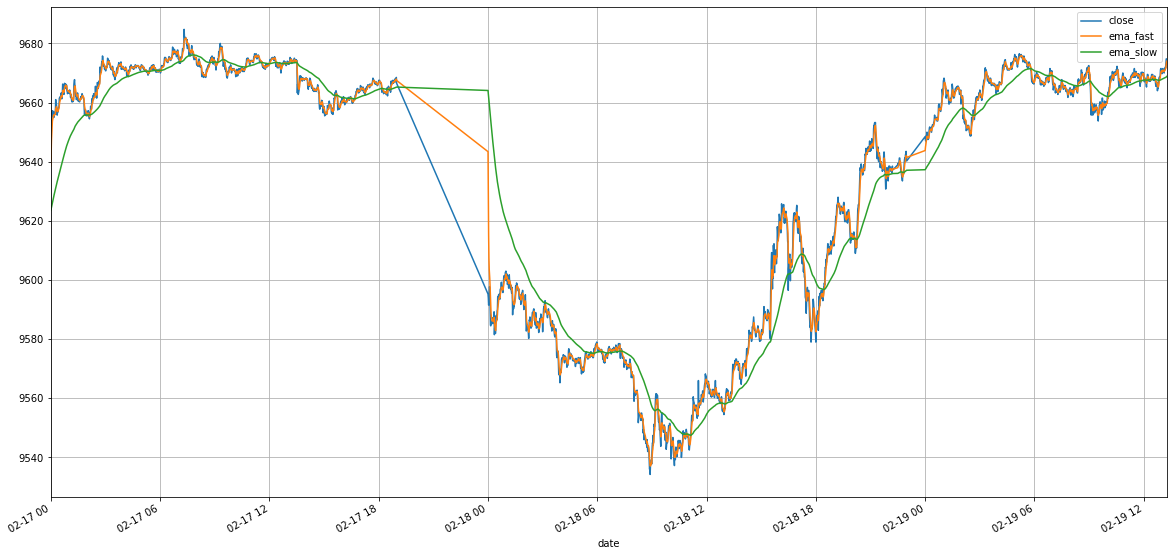

In [12]:
nq[['close', 'ema_fast', 'ema_slow']].loc['20200215':].plot(figsize=(20,10), grid=True);

In [13]:
cl = data['cl']

In [38]:
daily = pd.DataFrame()
for s in ['nq', 'cl', 'es', 'gc']:
    daily[s] = data[s].close.resample('B').last()

In [45]:
stds = daily.pct_change().rolling(22).std().loc['20190102':]

In [46]:
stds.loc['20190102':]

,nq,cl,es,gc
date,,,,
2019-01-02,0.021832,0.033381,0.018009,0.005000
2019-01-03,0.020854,0.033553,0.017185,0.005056
2019-01-04,0.022985,0.034379,0.018722,0.005427
2019-01-07,0.023177,0.034207,0.018870,0.005430
2019-01-08,0.022332,0.034496,0.018441,0.005289
...,...,...,...,...
2020-02-13,0.011763,0.019156,0.008874,0.006158
2020-02-14,0.011757,0.019573,0.008874,0.006115
2020-02-17,0.011693,0.019412,0.008785,0.006094


In [47]:
stds.mean() * np.sqrt(252)

nq    0.163856
cl    0.306360
es    0.127006
gc    0.108900
dtype: float64

In [48]:
hourly = pd.DataFrame()
for s in ['nq', 'cl', 'es', 'gc']:
    hourly[s] = data[s].close.resample('H').last()

In [49]:
hourly.loc['20190102':]

,nq,cl,es,gc
date,,,,
2019-01-02 00:00:00,6373.00,45.89,2517.00,1283.3
2019-01-02 01:00:00,6378.00,45.87,2517.50,1282.2
2019-01-02 02:00:00,6345.00,45.49,2505.50,1281.9
2019-01-02 03:00:00,6306.75,45.31,2493.25,1284.8
2019-01-02 04:00:00,6303.75,45.14,2493.00,1284.4
...,...,...,...,...
2020-02-19 09:00:00,9660.00,52.67,3376.25,1610.8
2020-02-19 10:00:00,9666.50,52.89,3376.50,1611.9
2020-02-19 11:00:00,9670.00,52.94,3377.50,1612.8


In [51]:
hourly.count() / daily.count()

nq    21.634783
cl    22.305866
es    21.860955
gc    22.608939
dtype: float64

In [68]:
stds_h = hourly.pct_change().rolling(int(22 * 22)).std().loc['20190102':]

In [69]:
stds_h.mean() * np.sqrt(22* 252)

nq    0.128038
cl    0.253134
es    0.099834
gc    0.091555
dtype: float64

In [71]:
(stds_h.mean() * np.sqrt(22*252)) / (stds.mean() * np.sqrt(252))

nq    0.781407
cl    0.826264
es    0.786057
gc    0.840731
dtype: float64

In [58]:
np.sqrt(21.5)

4.636809247747852

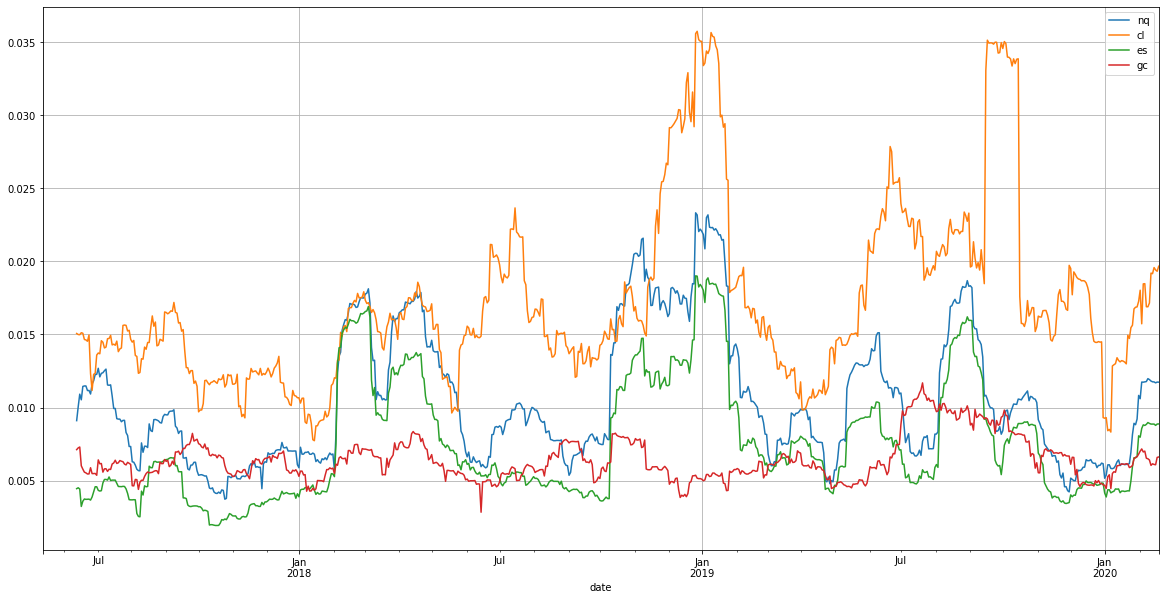

In [31]:
stds.plot(figsize=(20,10), grid=True);